In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df= pd.read_excel('preprocessed_data_2.xlsx')

### Hypotheses for the Kruskal-Wallis Test:
**Null Hypothesis (H₀):** The distributions of `Spend_Per_Visit` are identical across all `Occupation` groups. There is no statistically significant difference in spending behavior among the groups.

**Alternative Hypothesis (H₁):** At least one `Occupation` group's distribution of `Spend_Per_Visit` differs significantly from the others. There is a statistically significant difference in spending behavior among the groups.

In [23]:
from scipy.stats import kruskal

# Group data by Occupation or another grouping column
groups = [df[df['Occupation'] == occ]['Spend_Per_Visit'] for occ in df['Occupation'].unique()]

# Perform Kruskal-Wallis test
h_stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis H-Statistic: {h_stat}, P-Value: {p_value}")

Kruskal-Wallis H-Statistic: 13.55959102152316, P-Value: 0.018662745355128


### Interpretation of Results:
**Kruskal-Wallis H-Statistic:** 13.56  
**P-Value:** 0.0186  

- Since the p-value (**0.0186**) is **less than 0.05**, we reject the null hypothesis.
- This implies that there is a **statistically significant difference** in the distributions of `Spend_Per_Visit` across the `Occupation` groups.

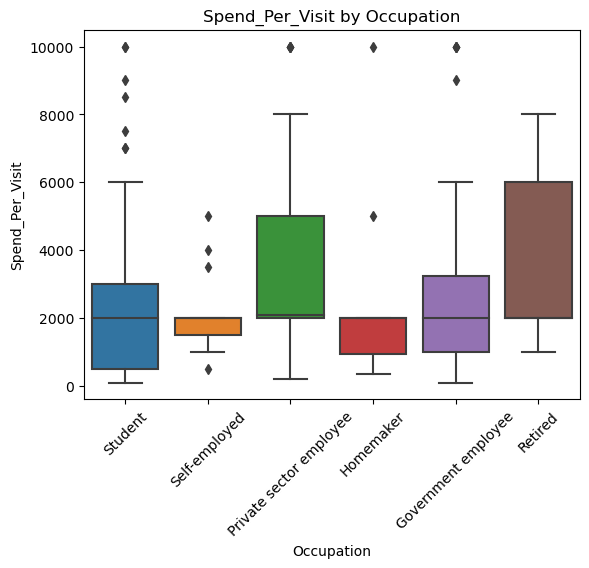

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Occupation', y='Spend_Per_Visit', data=df)
plt.title('Spend_Per_Visit by Occupation')
plt.xticks(rotation=45)
plt.show()

###  Hypotheses for Chi-Square Test:

**Null Hypothesis (H₀):** There is no association between `Shopping_Companion` and `Store_Type`. The choice of store type is independent of whether the shopper is accompanied or alone.

**Alternative Hypothesis (H₁):** There is an association between `Shopping_Companion` and `Store_Type`. The choice of store type depends on whether the shopper is accompanied or alone.

In [50]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Shopping_Companion'], df['Preferred_Store'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {p_value}")

Chi-Square Statistic: 19.06473592479652, P-Value: 0.014517246925632167




### Interpretation:

**Results:**
- **Chi-Square Statistic:** 19.06
- **P-Value:** 0.0145

**Conclusion:**
- Since the p-value (**0.0145**) is **less than 0.05**, you reject the null hypothesis.
- This implies that there is a **statistically significant association** between `Shopping_Companion` and `Store_Type`. In other words, the type of store chosen is influenced by whether the shopper is accompanied or shopping alone.



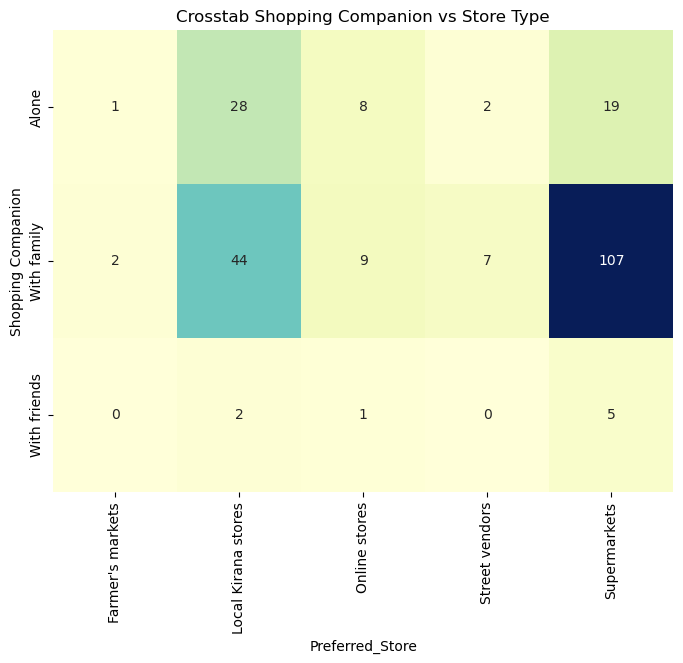

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the contingency table
contingency_table = pd.crosstab(df['Shopping_Companion'], df['Preferred_Store'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Crosstab Shopping Companion vs Store Type")
plt.xlabel("Preferred_Store")
plt.ylabel("Shopping Companion")
plt.show()

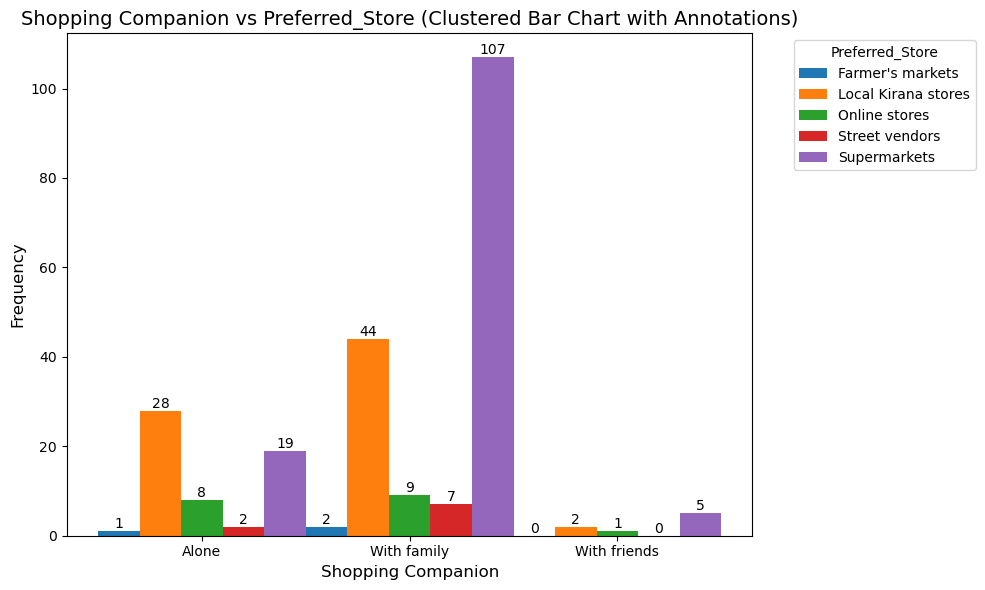

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the contingency table
contingency_table = pd.crosstab(df['Shopping_Companion'], df['Preferred_Store'])

# Plot the clustered bar chart
bar_width = 0.2  # Width of the bars
positions = np.arange(len(contingency_table))  # Positions for the groups

plt.figure(figsize=(10, 6))
for i, column in enumerate(contingency_table.columns):
    bars = plt.bar(positions + i * bar_width, contingency_table[column], width=bar_width, label=column)
    
    # Add annotations (values above each bar)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                 str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)

# Customize chart appearance
plt.title("Shopping Companion vs Preferred_Store (Clustered Bar Chart with Annotations)", fontsize=14)
plt.xlabel("Shopping Companion", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(positions + bar_width * (len(contingency_table.columns) - 1) / 2, contingency_table.index, rotation=0)
plt.legend(title="Preferred_Store", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Hypotheses for Chi-Square Test:

**Null Hypothesis (H₀):** There is no association between `Payment_Mode` and `Shopping_Frequency`. The choice of payment mode is independent of shopping frequency.

**Alternative Hypothesis (H₁):** There is an association between `Payment_Mode` and `Shopping_Frequency`. The choice of payment mode depends on shopping frequency.

---

In [85]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Payment_Mode'], df['Shopping_Frequency'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")



Chi-Square Statistic: 44.2442932483717
P-Value: 1.3875240134287392e-05




### Interpretation:

**Results:**
- **Chi-Square Statistic:** 44.24  
- **P-Value:** 1.39e-05 (0.0000139)

**Conclusion:**
- Since the **p-value < 0.05**, you reject the null hypothesis.
- This indicates a **statistically significant association** between `Payment_Mode` and `Shopping_Frequency`.

---

### Key Insight:
The results imply that the frequency with which individuals shop influences their preferred mode of payment. For example, frequent shoppers might favor faster payment methods (e.g., digital wallets), while occasional shoppers might rely on other options (e.g., cash or card).



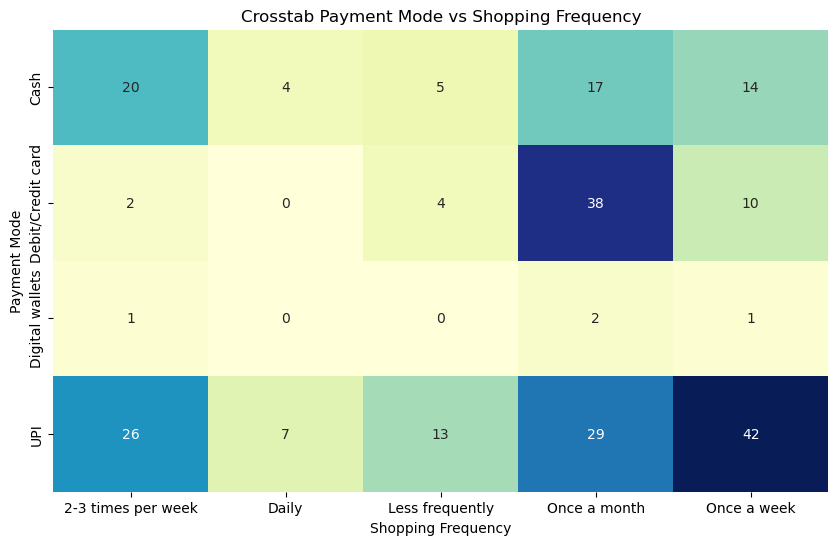

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the contingency table
contingency_table = pd.crosstab(df['Payment_Mode'], df['Shopping_Frequency'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Crosstab Payment Mode vs Shopping Frequency")
plt.xlabel("Shopping Frequency")
plt.ylabel("Payment Mode")
plt.show()


### Hypotheses for Chi-Square Test:
1. **Null Hypothesis (H₀):** There is no association between `Online_Shopping_Frequency` and `Cart_Abandonment_Reasons`. These variables are independent.
2. **Alternative Hypothesis (H₁):** There is an association between `Online_Shopping_Frequency` and `Cart_Abandonment_Reasons`. The variables are dependent.



In [77]:
from scipy.stats import chi2_contingency

# Example: Association between Online Shopping Frequency and Cart Abandonment Reasons
contingency_table = pd.crosstab(df['Online_Shopping_Frequency'], df['Cart_Abandonment_Reasons'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {p_value}")

Chi-Square Statistic: 269.2324863996028, P-Value: 9.785038421248125e-47


### Interpretation of Results:

**Chi-Square Statistic:** 269.23  
**P-Value:** 9.78e-47 (essentially **0**).
### Conclusion:
- Since the **p-value < 0.05**, you **reject the null hypothesis**.
- This strongly indicates a **statistically significant association** between `Online_Shopping_Frequency` and `Cart_Abandonment_Reasons`.

---

### Key Insight:
The findings suggest that the frequency of online shopping is closely related to the reasons for cart abandonment. For instance, frequent shoppers may abandon carts due to reasons such as "High delivery cost" or "Long delivery times," while occasional shoppers might abandon carts for different reasons like "Found a better deal."